In [1]:
import radiomics
from radiomics import featureextractor
import six, numpy as np
import SimpleITK as sitk


In [4]:
imagepath_1 = '../dataset/images/ISIC_0030977.jpg'
labelpath_1 = '../dataset/HAM10000_segmentations_lesion_tschandl/ISIC_0030977_segmentation.png'
imagepath_2 = '../dataset/images/ISIC_0027632.jpg'
labelpath_2 = '../dataset/HAM10000_segmentations_lesion_tschandl/ISIC_0027632_segmentation.png'

image_1 = sitk.ReadImage(imagepath_1)
label_1 = sitk.ReadImage(labelpath_1)
image_2 = sitk.ReadImage(imagepath_2)
label_2 = sitk.ReadImage(labelpath_2)

# m_array = sitk.GetArrayFromImage(label_1)
# flipped_m_array = np.where(m_array == 0, 1, 0)
# flipped_m = sitk.GetImageFromArray(flipped_m_array)
# xresult = extractor.execute(single_channel_image, flipped_m)



In [85]:
from tensorflow.keras.preprocessing import image
# img = image.load_img(imagepath_1)
# img = image.img_to_array(img)
# img
# mask = image.load_img(labelpath_1)
# mask = image.img_to_array(mask)
# img
image_array = sitk.GetArrayFromImage(label_1/255.0)

flipped_image_array = np.where(image_array == 0, 1, 0)

# mask = image.load_img(labelpath_1)
# mask = image.img_to_array(img)
# mask

In [88]:
xresult = extractor.execute(img, flipped_image)


ValueError: Error reading image Filepath or SimpleITK object

In [1]:
from tensorflow.keras.preprocessing import image
import cv2
import matplotlib.pyplot as plt
        
mask = image.load_img(labelpath_1, color_mode='grayscale')
mask = image.img_to_array(mask) / 255.0
mask_contours, _ = cv2.findContours((mask * 255).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

img = image.load_img(imagepath_1)
img = image.img_to_array(img)
t = cv2.imread(imagepath_1)
img_with_contours = t.copy()
# Draw the border of the segmentation mask with a blue line
img_with_contours = cv2.drawContours(img_with_contours, mask_contours, -1, (1, 0, 0), 2)
plt.imshow(s)
plt.show()
# plt.imsave('../dataset/test/mask.jpg', img_with_contours)
kernel = np.ones((5,5), np.uint8)
img_dilation = cv2.dilate(img_with_contours, kernel, iterations=1) 
# plt.imshow(img_dilation)

# # Draw the sborder of the soft attention map with a red line
# cv2.drawContours(t[0], contours, -1, (255, 0, 0), 2)

# contours, _ = cv2.findContours((attn_map > 0.4).astype(np.uint8), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
# cv2.drawContours(img_with_contours, contours, -1, (255, 0, 0), 2)
# plt.imshow(img_with_contours)
# plt.title
# plt.imsave('../dataset/test/or.jpg', t)
# plt.imshow(t)
# ax.set_title(f'Image ID: {image_id}')
# ax.axis('off')

2024-11-24 16:03:29.130824: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-24 16:03:29.131442: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-24 16:03:29.133797: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-11-24 16:03:29.140806: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-11-24 16:03:29.152778: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

NameError: name 'labelpath_1' is not defined

In [28]:
def erode_contours_by_cutter_size(img, contours, cutter_size):
    # Create an output image
    outputImage = np.zeros_like(img)
    # Iterate through every pixel in the image
    for x in range(img.shape[0]):
        for y in range(img.shape[1]):
            # Check if the pixel is black
            if img[y,x] != 255:
                # Check if the distance from this pixel to a contour is smaller than the cutter size
                for contour in contours:
                    dist = cv2.pointPolygonTest(contour, (x,y), True)                    
                    if abs(dist) < cutter_size:
                        outputImage[y,x] = 255
    return outputImage


In [29]:
img = 255-cv2.imread('../dataset/test/mask.jpg',0)
img = cv2.resize(img, (234,234))
cutter_size = 50
contours, _ = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img = erode_contours_by_cutter_size(img, contours, cutter_size)
cv2.imshow('img', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [30]:
maskpath_1 = '../dataset/test/mask.jpg'
impath_1 = '../dataset/test/or.jpg'
mask_1 = sitk.ReadImage(maskpath_1)
im_1 = sitk.ReadImage(impath_1)



In [31]:
im_1.GetDimension()

2

1


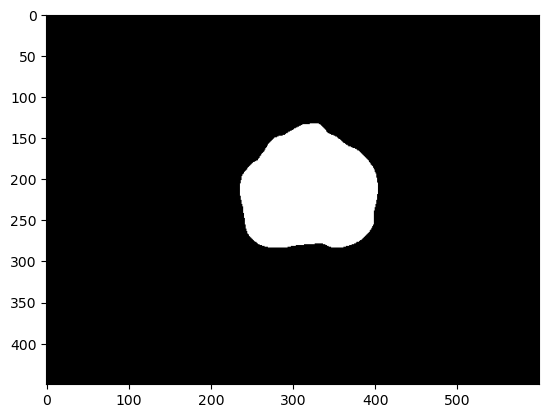

In [41]:
tt = cv2.imread(labelpath_1)
plt.imshow(tt)
print(label_1.GetNumberOfComponentsPerPixel())  # Should print 3 for RGB


ValueError: all the input array dimensions except for the concatenation axis must match exactly, but along dimension 1, the array at index 0 has size 2 and the array at index 1 has size 3

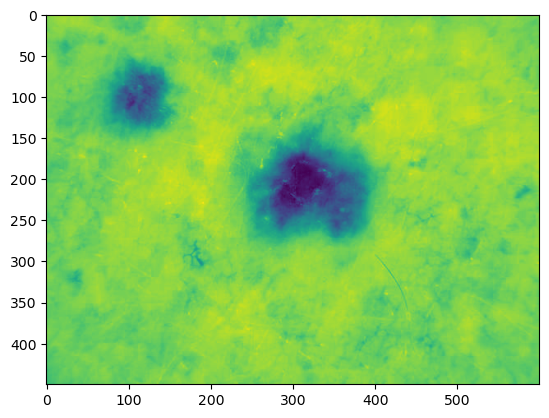

In [55]:
import os
import yaml
# radiomics.setVerbosity(logging.INFO)

params_path = os.path.join(os.getcwd(), 'Params.yaml')
with open(params_path, 'r') as file:
    params = yaml.safe_load(file)

single_channel_image = sitk.VectorIndexSelectionCast(im_1, 0) #sitk.ExtractComponentImageFilter()
# extract_filter.SetComponentIndex(0)  # 0 is for the first channel (red), 1 for green, 2 for blue
# single_channel_image = extract_filter.Execute(im_1)
plt.imshow(sitk.GetArrayFromImage(single_channel_image))
# plt.imshow(sitk.GetArrayFromImage(mask_1))

extractor = featureextractor.RadiomicsFeatureExtractor(params)
extractor.enableAllFeatures()
# extractor.disableFeatureByName(["JointAverage"])

# extractor.enableFeatureClassByName('shape2D')
result = extractor.execute(single_channel_image, mask_1, voxelBased=True)
print(result)

In [ ]:
result = extractor.execute(imageName, maskName, voxelBased=True)
for key, val in six.iteritems(result):
  if isinstance(val, sitk.Image):  # Feature map
    sitk.WriteImage(val, key + '.nrrd', True)
    print("Stored feature %s in %s" % (key, key + ".nrrd"))
  else:  # Diagnostic information
    print("\t%s: %s" %(key, val))

In [33]:
print('Result type:', type(result))  # result is returned in a Python ordered dictionary)
print('')
print('Calculated features')
for key, value in six.iteritems(result):
    print('\t', key, ':', value)

Result type: <class 'collections.OrderedDict'>

Calculated features
	 diagnostics_Versions_PyRadiomics : v3.0.1
	 diagnostics_Versions_Numpy : 2.1.1
	 diagnostics_Versions_SimpleITK : 2.0.0rc2.dev910-ga138e
	 diagnostics_Versions_PyWavelet : 1.7.0
	 diagnostics_Versions_Python : 3.10.15
	 diagnostics_Configuration_Settings : {'minimumROIDimensions': 2, 'minimumROISize': None, 'normalize': False, 'normalizeScale': 1, 'removeOutliers': None, 'resampledPixelSpacing': None, 'interpolator': 'sitkBSpline', 'preCrop': False, 'padDistance': 5, 'distances': [1], 'force2D': False, 'force2Ddimension': 0, 'resegmentRange': None, 'label': 1, 'additionalInfo': True, 'binWidth': 2, 'weightingNorm': None}
	 diagnostics_Configuration_EnabledImageTypes : {'Original': {}}
	 diagnostics_Image-original_Hash : 3ae67c6c7e69b63955dc98dd8fb2a27a30956ae9
	 diagnostics_Image-original_Dimensionality : 2D
	 diagnostics_Image-original_Spacing : (0.254, 0.254)
	 diagnostics_Image-original_Size : (600, 450)
	 diagnos

In [91]:
# Function to extract features for a small 3x3x3 window

def extract_local_features(image, mask, window_size = (5,5)):
    # Get image dimensions
    img_array = sitk.GetArrayFromImage(image)
    mask_array = sitk.GetArrayFromImage(mask)

    # Define the window size
    h, w = window_size
    local_features = np.zeros((img_array.shape[0] - h, img_array.shape[1] - w))

    # Slide window across the image
    for z in range(img_array.shape[0] - h):
        for x in range(img_array.shape[1] - w):
            # Extract the window
            window_image = img_array[z:z+h, x:x+w]
            window_mask = mask_array[z:z+h, x:x+w]
            
            # Extract features for this window
            features = extractor.execute(sitk.GetImageFromArray(window_image), sitk.GetImageFromArray(window_mask))
            
            # Store a specific feature (e.g., 'OriginalFirstOrder_Mean') or average of features
            local_features[z, x] = features['original_firstorder_Mean']
    
    return local_features

# Example usage
feature_map = extract_local_features(single_channel_image, mask_1,  window_size = (5,5))

ValueError: Label (1) not present in mask. Choose from [164 165 166 174 175 176 177 178 179 180 181 182]

Text(0.5, 1.0, 'Segmentation #1')

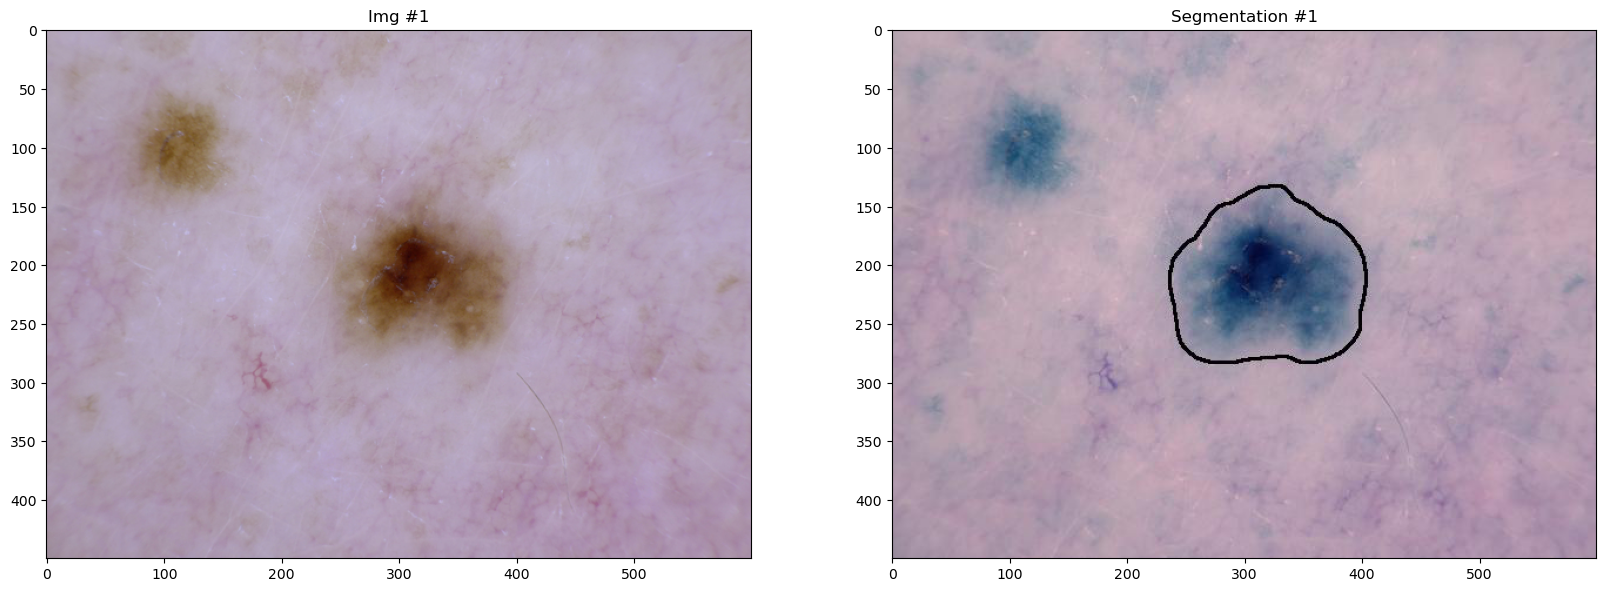

In [10]:
# Display the images
%matplotlib inline
import matplotlib.pyplot as plt

plt.figure(figsize=(20,20))
# First image
plt.subplot(2,2,1)
plt.imshow(sitk.GetArrayFromImage(image_1), cmap="gray")
plt.title("Img #1")
plt.subplot(2,2,2)
plt.imshow(sitk.GetArrayFromImage(mask_1),cmap = 'gray')        
plt.title("Segmentation #1")

# # Second image
# plt.subplot(2,2,3)
# plt.imshow(sitk.GetArrayFromImage(image_2), cmap="gray")        
# plt.title("Img #2")

# plt.subplot(2,2,4)
# plt.imshow(sitk.GetArrayFromImage(_2),cmap = 'gray')        
# plt.title("Segmentation #2")

# plt.show()

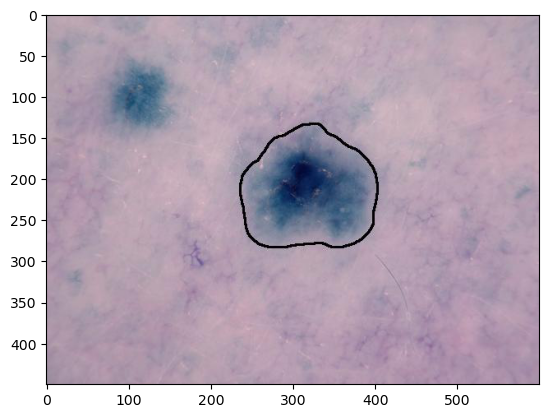

In [11]:
mask_np = sitk.GetArrayFromImage(mask_1)
plt.imshow(mask_np, cmap='gray')


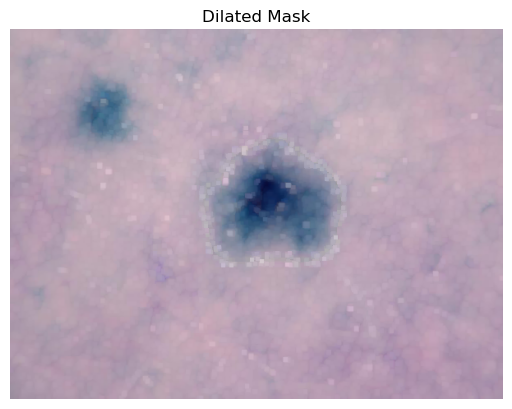

In [12]:
# Define the structuring element (you can adjust the size based on how large you want the ring)
kernel_size = 5  # Example size for dilation (this can be adjusted)

# Create a circular structuring element (disk-shaped kernel)
kernel = np.ones((kernel_size, kernel_size), np.uint8)

# Dilate the mask using OpenCV
dilated_mask = cv2.dilate(mask_np, kernel, iterations=1)

# Visualize the dilated mask
plt.imshow(dilated_mask, cmap='gray')
plt.title('Dilated Mask')
plt.axis('off')
plt.show()

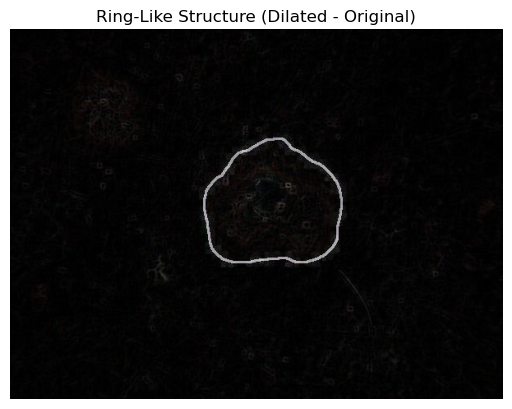

In [13]:
# Create the ring-like structure by subtracting the original mask from the dilated mask
ring_mask = dilated_mask - mask_np

# Visualize the ring-like structure
plt.imshow(ring_mask, cmap='gray')
plt.title('Ring-Like Structure (Dilated - Original)')
plt.axis('off')
plt.show()

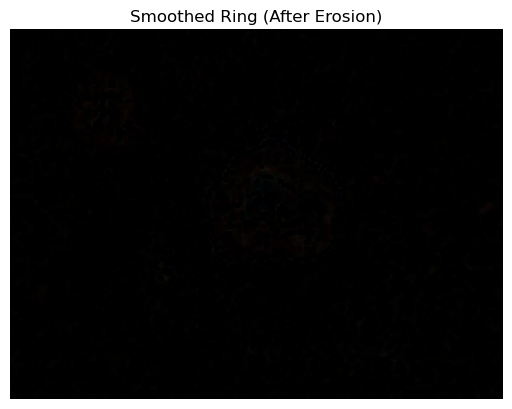

In [14]:
# Optional: Apply erosion to smooth the boundary (if necessary)
eroded_ring_mask = cv2.erode(ring_mask, kernel, iterations=1)

# Visualize the eroded ring (smoothed)
plt.imshow(eroded_ring_mask, cmap='gray')
plt.title('Smoothed Ring (After Erosion)')
plt.axis('off')
plt.show()

IndexError: too many indices for array: array is 2-dimensional, but 3 were indexed

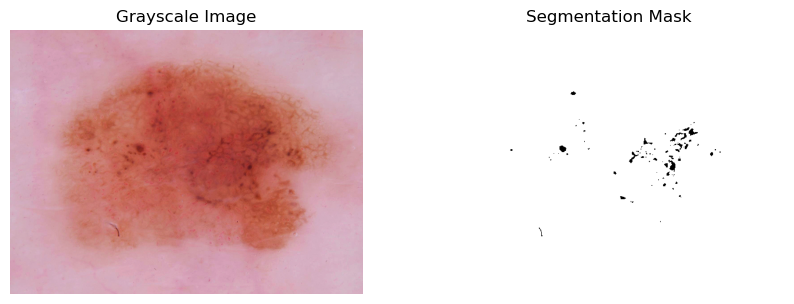

In [89]:
im_1, im_2 = '0024310', '0024351'
imagepath_1 = 'mel/ISIC_0024310.jpg'
imagepath_2 = 'mel/ISIC_0024351.jpg'
labelpath_1 = '../dataset/HAM10000_segmentations_lesion_tschandl/ISIC_0024310_segmentation.png'
labelpath_2 = '../dataset/HAM10000_segmentations_lesion_tschandl/ISIC_0024351_segmentation.png'

image_1 = sitk.ReadImage(imagepath_1)
label_1 = sitk.ReadImage(labelpath_1)
image_2 = sitk.ReadImage(imagepath_2)
label_2 = sitk.ReadImage(labelpath_2)

if image_2.GetNumberOfComponentsPerPixel() > 1:
    # If the image has more than one channel, convert to grayscale (e.g., take the first component)
    image = sitk.VectorIndexSelectionCast(image_2, 0)  # Select the first channel (usually R in RGB)

mask = sitk.BinaryThreshold(image, lowerThreshold=150, upperThreshold=255, insideValue=1, outsideValue=0)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(sitk.GetArrayFromImage(image_2), cmap='gray')
plt.title("Grayscale Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(sitk.GetArrayFromImage(mask), cmap='gray')
plt.title("Segmentation Mask")
plt.axis('off')

plt.show()

In [90]:
result = extractor.execute(image, mask)


Shape features are only available 3D input (for 2D input, use shape2D). Found 2D input
GLCM is symmetrical, therefore Sum Average = 2 * Joint Average, only 1 needs to be calculated


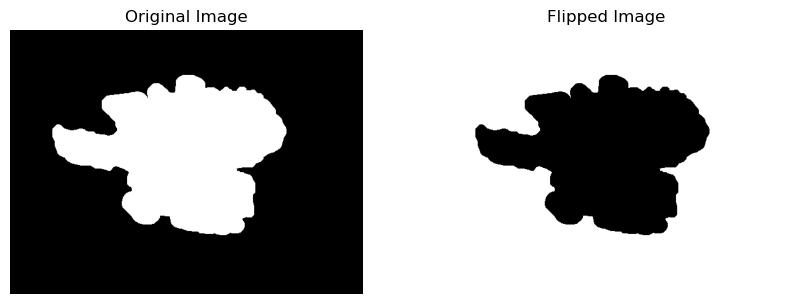

In [102]:
image_array = sitk.GetArrayFromImage(label_1)/255.0
# print(image_array)
# Interchange 0s with 1s and 1s with 0s
flipped_image_array = np.where(image_array == 0, 1.0, 0)

# Convert back to SimpleITK image
flipped_image = sitk.GetImageFromArray(flipped_image_array)
f_m = sitk.GetArrayFromImage(flipped_image)
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(image_array, cmap='gray')
plt.title("Original Image")
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(flipped_image_array, cmap='gray')
plt.title("Flipped Image ")
plt.axis('off')

plt.show()

In [103]:
result = extractor.execute(image_1, f_m)


ValueError: Error reading mask Filepath or SimpleITK object